# Case House Prices

### Predict sales prices

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### Análise Exploratória

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
df = pd.concat([data_train, data_test], ignore_index=True)

In [4]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

<Axes: >

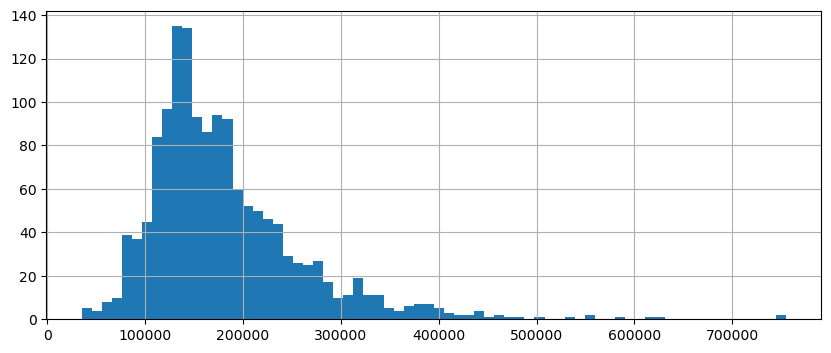

In [6]:
plt.figure(figsize=(10,4))
df['SalePrice'].hist(bins=70)

In [7]:
# Apagando a coluna Id pois não será útil para o modelo
df = df.drop('Id',axis=1)

## Missing Values

In [8]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_values[missing_values>0]
missing_data

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
BsmtFullBath       2
Functional         2
Exterior2nd        1
Exterior1st        1
GarageArea         1
GarageCars         1
SaleType           1
KitchenQual        1
BsmtFinSF1         1
Electrical         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
dtype: int64

In [9]:
# Visualizando os valores faltantes em termos de porcentagem com relação ao dataframe total

100*missing_data/len(df)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
MasVnrType      60.500171
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageYrBlt      5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrArea       0.787941
MSZoning         0.137033
BsmtHalfBath     0.068517
Utilities        0.068517
BsmtFullBath     0.068517
Functional       0.068517
Exterior2nd      0.034258
Exterior1st      0.034258
GarageArea       0.034258
GarageCars       0.034258
SaleType         0.034258
KitchenQual      0.034258
BsmtFinSF1       0.034258
Electrical       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
dtype: float64

### Analisando cada variável com valores faltantes

In [10]:
cols_missing_data = missing_data.index

In [11]:
cols_missing_data

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'SalePrice',
       'FireplaceQu', 'LotFrontage', 'GarageFinish', 'GarageQual',
       'GarageCond', 'GarageYrBlt', 'GarageType', 'BsmtCond', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrArea', 'MSZoning',
       'BsmtHalfBath', 'Utilities', 'BsmtFullBath', 'Functional',
       'Exterior2nd', 'Exterior1st', 'GarageArea', 'GarageCars', 'SaleType',
       'KitchenQual', 'BsmtFinSF1', 'Electrical', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF'],
      dtype='object')

In [12]:
for col in cols_missing_data: print(f"{col}: {df[col].unique()}\n")

PoolQC: [nan 'Ex' 'Fa' 'Gd']

MiscFeature: [nan 'Shed' 'Gar2' 'Othr' 'TenC']

Alley: [nan 'Grvl' 'Pave']

Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

MasVnrType: ['BrkFace' nan 'Stone' 'BrkCmn']

SalePrice: [208500. 181500. 223500. 140000. 250000. 143000. 307000. 200000. 129900.
 118000. 129500. 345000. 144000. 279500. 157000. 132000. 149000.  90000.
 159000. 139000. 325300. 139400. 230000. 154000. 256300. 134800. 306000.
 207500.  68500.  40000. 149350. 179900. 165500. 277500. 309000. 145000.
 153000. 109000.  82000. 160000. 170000. 130250. 141000. 319900. 239686.
 249700. 113000. 127000. 177000. 114500. 110000. 385000. 130000. 180500.
 172500. 196500. 438780. 124900. 158000. 101000. 202500. 219500. 317000.
 180000. 226000.  80000. 225000. 244000. 185000. 144900. 107400.  91000.
 135750. 136500. 193500. 153500. 245000. 126500. 168500. 260000. 174000.
 164500.  85000. 123600. 109900.  98600. 163500. 133900. 204750. 214000.
  94750.  83000. 128950. 205000. 178000. 118964. 198900. 169500

In [13]:
# Substituindo valores NaN

valores = {"PoolQC": 'No pool', "MiscFeature": 'None', "Alley": 'No alley access', "Fence": 'No fence', "MasVnrType": 'None',
          "FireplaceQu": 'No fireplace', "GarageCond": 'No garage', "GarageType": 'No garage', "GarageFinish": 'No garage',
          "GarageQual": 'No garage', "BsmtExposure": 'No basement', "BsmtFinType2": 'No basement', "BsmtCond": 'No basement',
          "BsmtQual": 'No basement', "BsmtFinType1": 'No basement', }

In [14]:
df = df.fillna(valores)

In [15]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
Exterior2nd        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
KitchenQual        1
GarageCars         1
GarageArea         1
SaleType           1
Electrical         1
dtype: int64

#### MasVnrArea

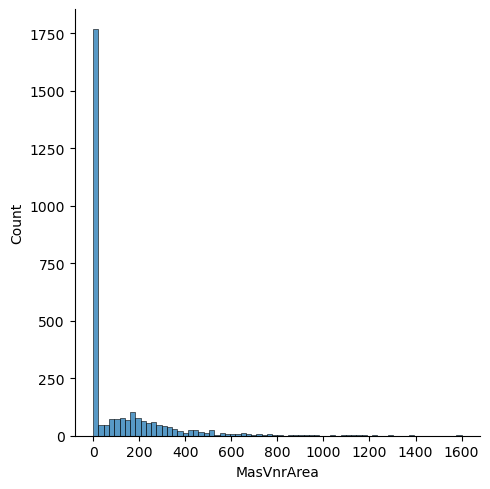

In [16]:
# MasVnrArea
sns.displot(data=df['MasVnrArea'])

In [17]:
# Substituindo pela mediana

df['MasVnrArea'] = df['MasVnrArea'].fillna(int(df['MasVnrArea'].median()))

In [18]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
Exterior2nd        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
KitchenQual        1
GarageCars         1
GarageArea         1
SaleType           1
Electrical         1
dtype: int64

#### GarageYrBlt

In [19]:
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
2914       NaN
2915    1970.0
2916    1960.0
2917       NaN
2918    1993.0
Name: GarageYrBlt, Length: 2919, dtype: float64

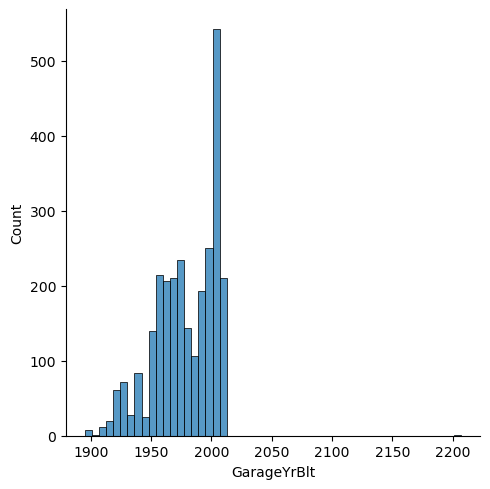

In [20]:
sns.displot(data=df['GarageYrBlt'])

In [21]:
df['GarageYrBlt'].describe()

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
25%      1960.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [22]:
int(df['GarageYrBlt'].median())

1979

In [23]:
# GarageYrBlt
# Substituindo valores ausentes pela mediana 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(int(df['GarageYrBlt'].median()))

In [24]:
df['GarageYrBlt'].isnull().sum()

np.int64(0)

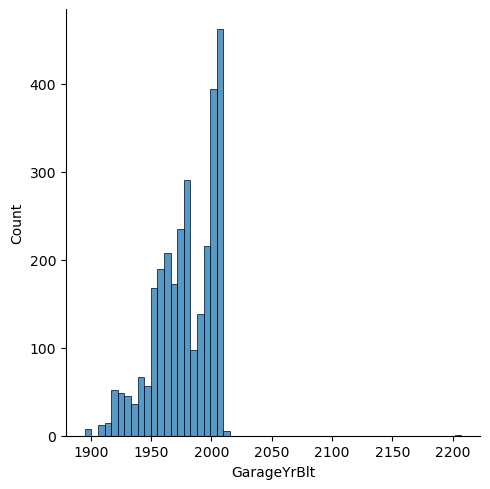

In [25]:
sns.displot(data=df['GarageYrBlt'])

In [26]:
df[df['GarageYrBlt'] > 2025]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2592,20,RL,68.0,8298,Pave,No alley access,IR1,HLS,AllPub,Inside,...,0,No pool,No fence,None,0,9,2007,New,Partial,NaN


In [27]:
df = df[df['GarageYrBlt'] <= 2025]

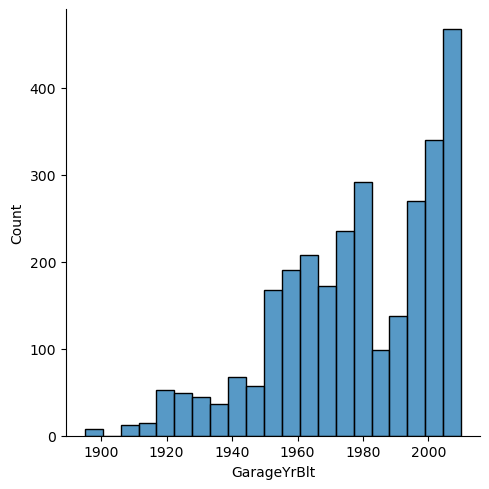

In [28]:
sns.displot(data=df['GarageYrBlt'])

In [29]:
df['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
2914    1979.0
2915    1970.0
2916    1960.0
2917    1979.0
2918    1993.0
Name: GarageYrBlt, Length: 2918, dtype: float64

#### LotFrontage

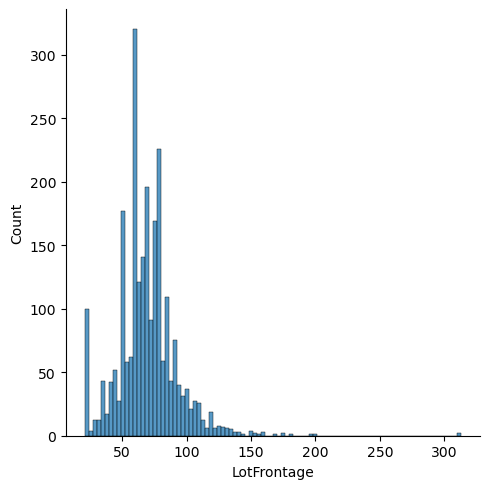

In [30]:
# LotFrontage

sns.displot(data=df['LotFrontage'])

In [31]:
# LotFrontage
# Substituindo valores ausentes pela mediana 
df['LotFrontage'] = df['LotFrontage'].fillna(int(df['LotFrontage'].median()))

In [32]:
df['LotFrontage'].isnull().sum()

np.int64(0)

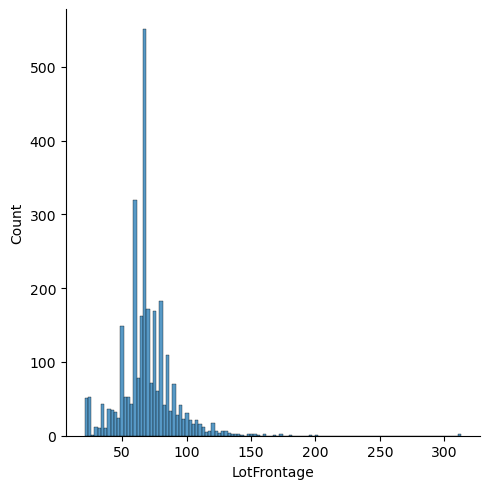

In [33]:
sns.displot(data=df['LotFrontage'])

In [34]:
df[df['LotFrontage'] > 300]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,20,RL,313.0,27650,Pave,No alley access,IR2,HLS,AllPub,Inside,...,0,No pool,No fence,None,0,11,2008,WD,Normal,242000.0
1298,60,RL,313.0,63887,Pave,No alley access,IR3,Bnk,AllPub,Corner,...,480,Gd,No fence,None,0,1,2008,New,Partial,160000.0


In [35]:
df = df[df['LotFrontage'] < 300]

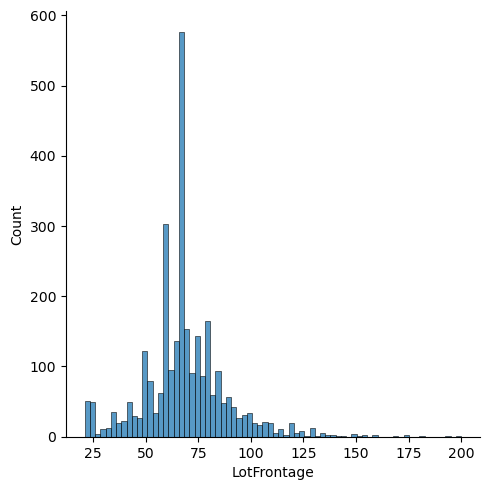

In [36]:
sns.displot(data=df['LotFrontage'])

In [37]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

SalePrice       1458
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Exterior1st        1
Exterior2nd        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
KitchenQual        1
GarageCars         1
GarageArea         1
SaleType           1
Electrical         1
dtype: int64

In [38]:
cols_null = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
cols_null.index

Index(['SalePrice', 'MSZoning', 'Utilities', 'BsmtFullBath', 'BsmtHalfBath',
       'Functional', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'KitchenQual', 'GarageCars', 'GarageArea',
       'SaleType', 'Electrical'],
      dtype='object')

In [39]:
# Apagando os valores faltantes dessas colunas pela pequena quantidade de dados faltantes

df.dropna(subset=cols_null.index.drop('SalePrice'), axis=0, inplace=True)

In [40]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

SalePrice    1446
dtype: int64

## Variáveis Categóricas

In [41]:
cat_values = list(df.select_dtypes(['object']).columns)

In [42]:
cat_values

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [43]:
for value in cat_values: print(f"{value}: {df[value].value_counts()}\n")

MSZoning: MSZoning
RL         2256
RM          457
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

Street: Street
Pave    2892
Grvl      11
Name: count, dtype: int64

Alley: Alley
No alley access    2706
Grvl                119
Pave                 78
Name: count, dtype: int64

LotShape: LotShape
Reg    1851
IR1     962
IR2      75
IR3      15
Name: count, dtype: int64

LandContour: LandContour
Lvl    2612
HLS     118
Bnk     115
Low      58
Name: count, dtype: int64

Utilities: Utilities
AllPub    2902
NoSeWa       1
Name: count, dtype: int64

LotConfig: LotConfig
Inside     2122
Corner      508
CulDSac     176
FR2          84
FR3          13
Name: count, dtype: int64

LandSlope: LandSlope
Gtl    2764
Mod     123
Sev      16
Name: count, dtype: int64

Neighborhood: Neighborhood
NAmes      442
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    164
Sawyer     150
NWAmes     131
SawyerW    125
Mitchel    113
BrkSide    107
Cra

In [44]:
df['MSZoning'] = df['MSZoning'].replace(['RH', 'C (all)'], 'Other')
df['Alley'] = df['Alley'].replace(['Grvl', 'Pave'], 'With alley acess')
df['LotShape'] = df['LotShape'].replace(['IR1', 'IR2', 'IR3'], 'Irr')
df['LotConfig'] = df['LotConfig'].replace(['FR2', 'FR3'], 'FR2/FR3')
df['LandSlope'] = df['LandSlope'].replace(['Mod', 'Sev'], 'No Gtl')
df['Condition1'] = df['Condition1'].replace(['RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'], 'Other')
df['HouseStyle'] = df['HouseStyle'].replace(['1.5Fin', '1.5Unf', '2.5Fin', '2.5Unf'], '2Story')
df['RoofStyle'] = df['RoofStyle'].replace(['Flat', 'Gambrel', 'Mansard', 'Shed'], 'Others')
df['RoofMatl'] = df['RoofMatl'].replace(['Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Membran', 'Roll', 'ClyTile'], 'Others')
df['ExterCond'] = df['ExterCond'].replace(['Gd', 'Ex'], 'Above TA')
df['ExterCond'] = df['ExterCond'].replace(['Fa', 'Po'], 'Below TA')
df['Heating'] = df['Heating'].replace(['GasW', 'Grav', 'Wall', 'OthW', 'Floor'], 'Others')
df['Electrical'] = df['Electrical'].replace(['FuseA', 'FuseF', 'FuseP', 'Mix'], 'Others')
df['Functional'] = df['Functional'].replace(['Min2', 'Min1', 'Mod', 'Maj1', 'Maj2', 'Sev'], 'No typ')
df['FireplaceQu'] = df['FireplaceQu'].replace(['Gd', 'Ex'], 'Above TA')
df['FireplaceQu'] = df['FireplaceQu'].replace(['Fa', 'Po'], 'Below TA')
df['GarageType'] = df['GarageType'].replace(['Basment', 'CarPort', '2Types', 'BuiltIn'], 'Others')
df['GarageQual'] = df['GarageQual'].replace(['Gd', 'Ex'], 'Above TA')
df['GarageQual'] = df['GarageQual'].replace(['Fa', 'Po'], 'Below TA')
df['GarageCond'] = df['GarageCond'].replace(['Gd', 'Ex'], 'Above TA')
df['GarageCond'] = df['GarageCond'].replace(['Fa', 'Po'], 'Below TA')
df['PavedDrive'] = df['PavedDrive'].replace(['N', 'P'], 'Partial/No pavement')
df['SaleType'] = df['SaleType'].replace(['ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con'], 'Other')
df['BldgType'] = df['BldgType'].replace(['TwnhsE', 'Twnhs'], 'Twnhs')
df['BldgType'] = df['BldgType'].replace(['Duplex', '2fmCon'], 'Duplex/2fmCon')
df['Foundation'] = df['Foundation'].replace(['Slab', 'Stone', 'Wood'], 'Other')
df['BsmtQual'] = df['BsmtQual'].replace(['Gd', 'Ex'], 'Above TA')
df['BsmtQual'] = df['BsmtQual'].replace(['Fa', 'Po'], 'Below TA')
df['BsmtCond'] = df['BsmtCond'].replace(['Gd', 'Ex'], 'Above TA')
df['BsmtCond'] = df['BsmtCond'].replace(['Fa', 'Po'], 'Below TA')
df['Exterior1st'] = df['Exterior1st'].replace(['Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock'], 'Other')
df['Neighborhood'] = df['Neighborhood'].replace(['Mitchel', 'NoRidge', 'IDOTRR', 'Timber', 'ClearCr', 'StoneBr', 'SWISU', 'MeadowV', 'Blmngtn', 'BrDale', 'Veenker', 'NPkVill', 'Blueste'], 'Other')
df['SaleCondition'] = df['SaleCondition'].replace(['Family', 'Alloca', 'AdjLand'], 'Other')
df['HeatingQC'] = df['HeatingQC'].replace(['Fa', 'Po'], 'Fa/Po')

In [45]:
df.drop(['Condition2', 'Exterior2nd', 'BsmtFinType2'], axis=1, inplace=True)

In [46]:
df['Utilities'].value_counts()

Utilities
AllPub    2902
NoSeWa       1
Name: count, dtype: int64

In [47]:
# Apagando linha onde Utilities = NoSeWa por ter apenas uma ocorrência

df.drop(df.index[(df["Utilities"] == "NoSeWa")],axis=0,inplace=True)

In [48]:
df['Street'].value_counts()

Street
Pave    2891
Grvl      11
Name: count, dtype: int64

In [49]:
# Criar nova coluna HasPavedStreet a partir da coluna Street
df['HasPavedStreet'] = (df['Street'] != 'Pave').astype(int)
# Apagando a coluna Street pois não será mais útil
df.drop('Street', axis=1, inplace=True)

In [50]:
df['PoolQC'].value_counts()

PoolQC
No pool    2893
Ex            4
Gd            3
Fa            2
Name: count, dtype: int64

In [51]:
# Criar nova coluna HasPool a partir da coluna PoolQC
df['HasPool'] = (df['PoolQC'] != 'No pool').astype(int)
# Apagando a coluna PoolQC pois não será mais útil
df.drop('PoolQC', axis=1, inplace=True)

In [52]:
df['MiscFeature'].value_counts()

MiscFeature
None    2798
Shed      94
Gar2       5
Othr       4
TenC       1
Name: count, dtype: int64

In [53]:
# Criar uma nova coluna HasMiscFeature
df['HasMiscFeature'] = (df['MiscFeature'] != 'None').astype(int)
# Apagando a coluna MisFeature pois não será mais útil
df.drop('MiscFeature', axis=1, inplace=True)

In [54]:
#cat_values = list(data_train.select_dtypes(['object']).columns)

for value in list(df.select_dtypes(['object']).columns): print(f"{value}: {df[value].value_counts()}\n")

MSZoning: MSZoning
RL       2255
RM        457
FV        139
Other      51
Name: count, dtype: int64

Alley: Alley
No alley access     2705
With alley acess     197
Name: count, dtype: int64

LotShape: LotShape
Reg    1851
Irr    1051
Name: count, dtype: int64

LandContour: LandContour
Lvl    2611
HLS     118
Bnk     115
Low      58
Name: count, dtype: int64

Utilities: Utilities
AllPub    2902
Name: count, dtype: int64

LotConfig: LotConfig
Inside     2122
Corner      508
CulDSac     175
FR2/FR3      97
Name: count, dtype: int64

LandSlope: LandSlope
Gtl       2763
No Gtl     139
Name: count, dtype: int64

Neighborhood: Neighborhood
Other      635
NAmes      442
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    164
Sawyer     150
NWAmes     131
SawyerW    125
BrkSide    107
Crawfor    103
Name: count, dtype: int64

Condition1: Condition1
Norm      2501
Feedr      160
Other      151
Artery      90
Name: count, dtype: int64

BldgType: BldgType
1Fam   

In [55]:
cols = list(df.select_dtypes(['object']).columns)

df_dummies = pd.get_dummies(df, 
                            columns=cols,
                            prefix=cols,
                            drop_first=True)

In [56]:
df_dummies['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2902, dtype: float64

In [57]:
df_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No fence,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,True,True,False,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,True,False,False,True,True,False,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,True,True,False,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,False,False,True,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,True,True,False,False


In [58]:
corr_matrix = df_dummies.corr()

# Cria uma máscara para o triângulo superior, incluindo a diagonal
mask = np.triu(np.ones(corr_matrix.shape)).astype(bool)

# Aplica a máscara para obter os valores do triângulo inferior
lower_triangle_corr = corr_matrix.mask(mask)

# Remove as colunas e linhas que agora contêm apenas valores NaN
lower_triangle_corr = lower_triangle_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

print(lower_triangle_corr)

                       MSSubClass  LotFrontage   LotArea  OverallQual  \
LotFrontage             -0.404023          NaN       NaN          NaN   
LotArea                 -0.202709     0.342606       NaN          NaN   
OverallQual              0.030748     0.210309  0.105459          NaN   
OverallCond             -0.066941    -0.075254 -0.024500    -0.102813   
YearBuilt                0.032894     0.121163  0.030686     0.597351   
...                           ...          ...       ...          ...   
SaleType_Other           0.032992    -0.018276 -0.014049    -0.063543   
SaleType_WD              0.036988    -0.080277 -0.009495    -0.199208   
SaleCondition_Normal     0.025880    -0.083630 -0.021665    -0.137105   
SaleCondition_Other      0.006242     0.002054  0.021372    -0.059372   
SaleCondition_Partial   -0.045405     0.110356  0.028984     0.330986   

                       OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
LotFrontage                    NaN        NaN   

In [59]:
lower_triangle_corr['SalePrice']

LotFrontage                   NaN
LotArea                       NaN
OverallQual                   NaN
OverallCond                   NaN
YearBuilt                     NaN
                           ...   
SaleType_Other          -0.022363
SaleType_WD             -0.245396
SaleCondition_Normal    -0.155935
SaleCondition_Other     -0.061007
SaleCondition_Partial    0.354113
Name: SalePrice, Length: 145, dtype: float64

In [60]:
# Identificando variáveis com alta correlação (>0.75)
cols_to_drop = []
for col in lower_triangle_corr.columns:
    cols = lower_triangle_corr.index[lower_triangle_corr[col] > 0.75].tolist()
    if cols:
        # Adicionar a coluna atual à lista de remoção
        cols_to_drop.append(col)

# Exibir a lista de colunas a serem removidas
print("As seguintes colunas serão removidas por serem redundantes:")
print(cols_to_drop)

As seguintes colunas serão removidas por serem redundantes:
['OverallQual', 'YearBuilt', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'PoolArea', 'BsmtQual_No basement', 'BsmtCond_No basement', 'BsmtExposure_No basement', 'GarageType_No garage', 'GarageFinish_No garage', 'GarageQual_No garage', 'SaleType_New']


In [61]:
data = df_dummies.drop(columns=cols_to_drop)

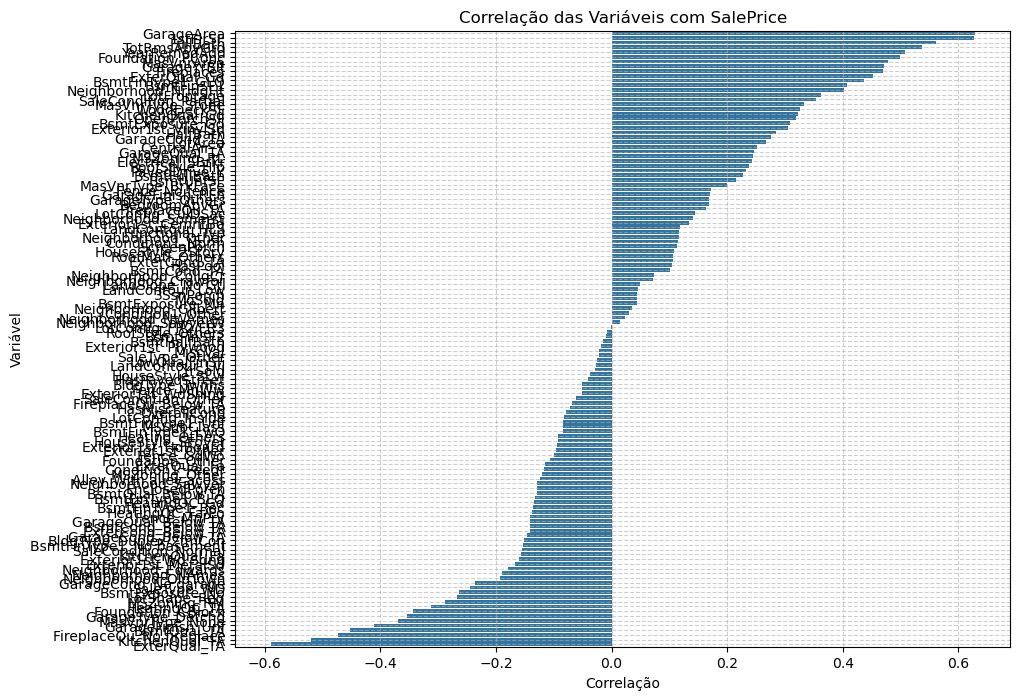

In [62]:
# Correlação das variáveis com a variável target SalePrice

# Calculando a correlação de todas as variáveis com SalePrice
correlations = data.corr()['SalePrice']

# Removendo a correlação da própria variável SalePrice e ordenando os valores
correlations = correlations.drop('SalePrice').sort_values(ascending=False)

# Gráfico de barras para visualizar
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title('Correlação das Variáveis com SalePrice')
plt.xlabel('Correlação')
plt.ylabel('Variável')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [63]:
# Filtrar variável com maior correlação com a variável target

strong_correlations = correlations[(correlations > 0.4) | (correlations < -0.3)]
print(strong_correlations)

GarageArea                  0.628683
1stFlrSF                    0.626204
FullBath                    0.560849
TotRmsAbvGrd                0.536416
YearRemodAdd                0.507461
Foundation_PConc            0.499072
MasVnrArea                  0.478102
GarageYrBlt                 0.470345
Fireplaces                  0.470033
ExterQual_Gd                0.452829
BsmtFinType1_GLQ            0.435896
BsmtFinSF1                  0.407028
Neighborhood_NridgHt        0.402282
HeatingQC_TA               -0.313054
Foundation_CBlock          -0.344301
GarageType_Detchd          -0.354523
MasVnrType_None            -0.369140
GarageFinish_Unf           -0.411269
BsmtQual_TA                -0.452488
FireplaceQu_No fireplace   -0.472589
KitchenQual_TA             -0.520344
ExterQual_TA               -0.590204
Name: SalePrice, dtype: float64


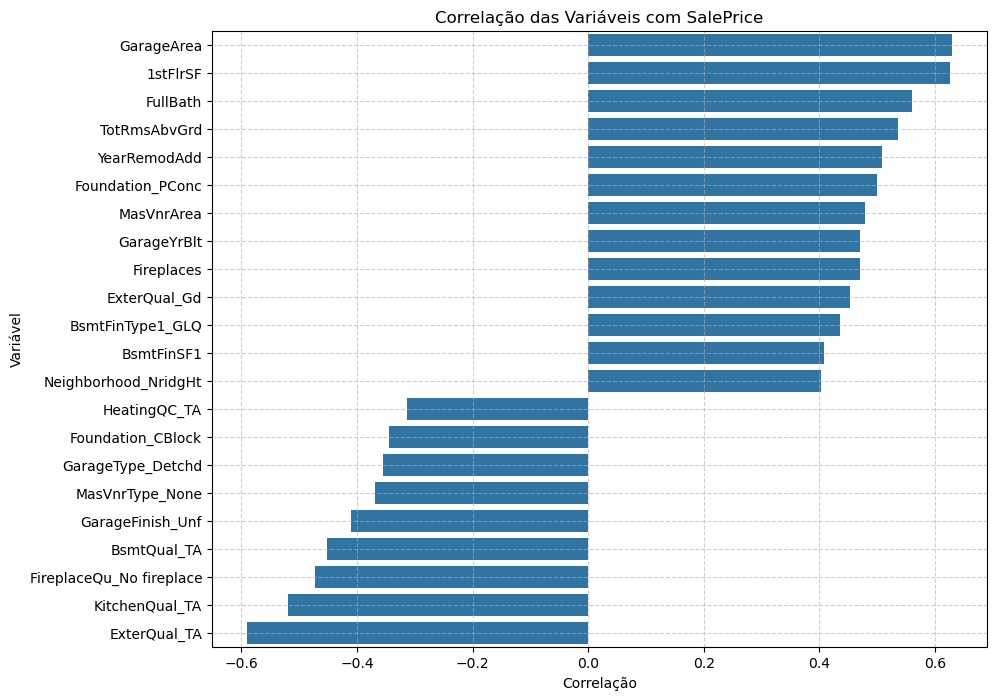

In [64]:
# Gráfico de barras para visualizar as correlações mais fortes
plt.figure(figsize=(10, 8))
sns.barplot(x=strong_correlations.values, y=strong_correlations.index)
plt.title('Correlação das Variáveis com SalePrice')
plt.xlabel('Correlação')
plt.ylabel('Variável')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [65]:
strong_correlations.index

Index(['GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd',
       'Foundation_PConc', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'ExterQual_Gd', 'BsmtFinType1_GLQ', 'BsmtFinSF1',
       'Neighborhood_NridgHt', 'HeatingQC_TA', 'Foundation_CBlock',
       'GarageType_Detchd', 'MasVnrType_None', 'GarageFinish_Unf',
       'BsmtQual_TA', 'FireplaceQu_No fireplace', 'KitchenQual_TA',
       'ExterQual_TA'],
      dtype='object')

In [66]:
df2 = df_dummies[['GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd',
       'Foundation_PConc', 'MasVnrArea', 'Fireplaces', 'GarageYrBlt',
       'ExterQual_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_TA', 'Foundation_CBlock',
       'GarageType_Detchd', 'MasVnrType_None', 'GarageFinish_Unf',
       'BsmtQual_TA', 'FireplaceQu_No fireplace', 'KitchenQual_TA',
       'ExterQual_TA']]

In [67]:
df2

,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearRemodAdd,Foundation_PConc,MasVnrArea,Fireplaces,GarageYrBlt,ExterQual_Gd,BsmtFinType1_GLQ,HeatingQC_TA,Foundation_CBlock,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_No fireplace,KitchenQual_TA,ExterQual_TA
0,548.0,856,2,8,2003,True,196.0,0,2003.0,True,True,False,False,False,False,False,False,True,False,False
1,460.0,1262,2,6,1976,False,0.0,1,1976.0,False,False,False,True,False,True,False,False,False,True,True
2,608.0,920,2,6,2002,True,162.0,1,2001.0,True,True,False,False,False,False,False,False,False,False,False
3,642.0,961,1,7,1970,False,0.0,1,1998.0,False,False,False,False,True,True,True,True,False,False,True
4,836.0,1145,2,9,2000,True,350.0,1,2000.0,True,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,546,1,5,1970,False,0.0,0,1979.0,False,False,False,True,False,True,False,True,True,True,True
2915,286.0,546,1,6,1970,False,0.0,0,1970.0,False,False,True,True,False,True,True,True,True,True,True
2916,576.0,1224,1,7,1996,False,0.0,1,1960.0,False,False,False,True,True,True,True,True,False,True,True
2917,0.0,970,1,6,1992,True,0.0,0,1979.0,False,True,True,False,False,True,False,False,True,True,True


In [68]:
df_dummies['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2902, dtype: float64

## Modelo de Regressão Linear

In [69]:
df_dummies[df_dummies['SalePrice'].isnull()]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No fence,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,True,False,False,False,False,True,True,False,False
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,True,False,False,True,True,False,False
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,True,False,False,False,False,True,True,False,False
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,True,False,False,True,True,False,False
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,False,False,False,True,False,False,True,True,False,False
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,False,False,False,True,False,False,True,False,False,False
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,False,True,False,False,True,False,False,False
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,True,False,False,False,False,True,True,False,False


In [70]:
df_train = df2.iloc[:1456]
df_test = df2.iloc[1456:]

In [71]:
df_train

,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearRemodAdd,Foundation_PConc,MasVnrArea,Fireplaces,GarageYrBlt,ExterQual_Gd,BsmtFinType1_GLQ,HeatingQC_TA,Foundation_CBlock,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_No fireplace,KitchenQual_TA,ExterQual_TA
0,548.0,856,2,8,2003,True,196.0,0,2003.0,True,True,False,False,False,False,False,False,True,False,False
1,460.0,1262,2,6,1976,False,0.0,1,1976.0,False,False,False,True,False,True,False,False,False,True,True
2,608.0,920,2,6,2002,True,162.0,1,2001.0,True,True,False,False,False,False,False,False,False,False,False
3,642.0,961,1,7,1970,False,0.0,1,1998.0,False,False,False,False,True,True,True,True,False,False,True
4,836.0,1145,2,9,2000,True,350.0,1,2000.0,True,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460.0,953,2,7,2000,True,0.0,1,1999.0,False,False,False,False,False,True,False,False,False,True,True
1456,500.0,2073,2,7,1988,False,119.0,2,1978.0,False,False,True,True,False,False,True,False,False,True,True
1457,252.0,1188,2,9,2006,False,0.0,2,1941.0,False,True,False,False,False,True,False,True,False,False,False
1458,240.0,1078,1,5,1996,False,0.0,0,1950.0,False,True,False,True,False,True,True,True,True,False,True


In [72]:
df_test

,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearRemodAdd,Foundation_PConc,MasVnrArea,Fireplaces,GarageYrBlt,ExterQual_Gd,BsmtFinType1_GLQ,HeatingQC_TA,Foundation_CBlock,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_No fireplace,KitchenQual_TA,ExterQual_TA
1460,730.0,896,1,5,1961,False,0.0,0,1961.0,False,False,True,True,False,True,True,True,True,True,True
1461,312.0,1329,1,6,1958,False,108.0,0,1958.0,False,False,True,True,False,False,True,True,True,False,True
1462,482.0,928,2,6,1998,True,0.0,1,1997.0,False,True,False,False,False,True,False,False,False,True,True
1463,470.0,926,2,7,1998,True,20.0,1,1998.0,False,True,False,False,False,False,False,True,False,False,True
1464,506.0,1280,2,5,1992,True,0.0,0,1992.0,True,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,546,1,5,1970,False,0.0,0,1979.0,False,False,False,True,False,True,False,True,True,True,True
2915,286.0,546,1,6,1970,False,0.0,0,1970.0,False,False,True,True,False,True,True,True,True,True,True
2916,576.0,1224,1,7,1996,False,0.0,1,1960.0,False,False,False,True,True,True,True,True,False,True,True
2917,0.0,970,1,6,1992,True,0.0,0,1979.0,False,True,True,False,False,True,False,False,True,True,True


In [73]:
# Duplicando 13 linhas aleatórias para conseguir submeter no Kaggle
df_test = pd.concat([df_test, df_test.sample(n=13, random_state=42)], ignore_index=True)

In [74]:
df_test

,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearRemodAdd,Foundation_PConc,MasVnrArea,Fireplaces,GarageYrBlt,ExterQual_Gd,BsmtFinType1_GLQ,HeatingQC_TA,Foundation_CBlock,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_No fireplace,KitchenQual_TA,ExterQual_TA
0,730.0,896,1,5,1961,False,0.0,0,1961.0,False,False,True,True,False,True,True,True,True,True,True
1,312.0,1329,1,6,1958,False,108.0,0,1958.0,False,False,True,True,False,False,True,True,True,False,True
2,482.0,928,2,6,1998,True,0.0,1,1997.0,False,True,False,False,False,True,False,False,False,True,True
3,470.0,926,2,7,1998,True,20.0,1,1998.0,False,True,False,False,False,False,False,True,False,False,True
4,506.0,1280,2,5,1992,True,0.0,0,1992.0,True,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,240.0,1014,1,6,1989,False,0.0,1,1940.0,False,False,False,True,True,True,True,True,False,False,True
1455,400.0,744,2,7,2004,True,0.0,0,2004.0,True,True,False,False,False,True,False,False,True,False,False
1456,656.0,1120,1,5,2004,True,165.0,1,1966.0,True,False,False,False,False,False,False,True,False,True,False
1457,658.0,1497,3,9,1963,False,234.0,1,1963.0,False,False,False,True,False,False,True,True,False,True,True


In [75]:
X_train = df_train

In [76]:
y_train = df_dummies['SalePrice'].iloc[:1456]

In [77]:
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1456, dtype: float64

In [78]:
X_test = df_test

In [79]:
lm = LinearRegression()

In [80]:
lm.fit(X_train, y_train)

LinearRegression()

In [81]:
print('Coeficientes:\n', lm.coef_)

Coeficientes:
 [ 7.40648405e+01  4.19238877e+01  4.19385803e+03  9.68691425e+03
  4.24047233e+02  1.83905524e+04  8.16369859e+01  2.72834680e+04
 -1.33123175e+02 -3.99534013e+04  1.92089749e+04 -5.14631360e+03
  9.23311621e+03 -4.04954203e+03  1.72733615e+04 -6.47679010e+03
 -4.38062698e+03  1.16108222e+04 -9.16121044e+03 -5.46148634e+04]


In [82]:
predictions = lm.predict(X_test)

In [83]:
len(predictions)

1459

In [84]:
submission = pd.read_csv('sample_submission.csv')

In [85]:
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [86]:
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [87]:
submission['SalePrice']

0       169277.052498
1       187758.393989
2       183583.683570
3       179317.477511
4       150730.079977
            ...      
1454    167081.220949
1455    164788.778231
1456    219222.423400
1457    184924.279659
1458    187741.866657
Name: SalePrice, Length: 1459, dtype: float64

In [88]:
len(predictions)

1459

Text(0, 0.5, 'Predicted Y')

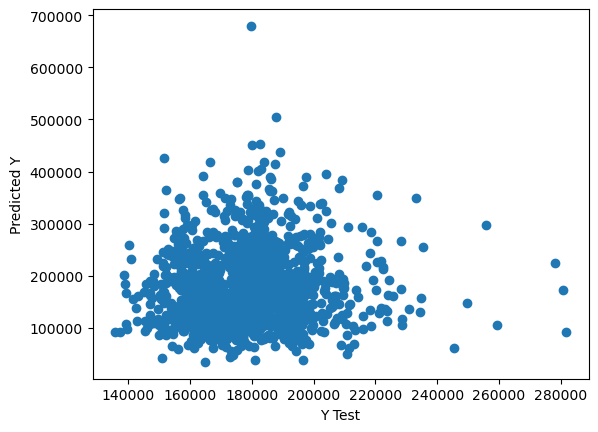

In [89]:
plt.scatter(submission['SalePrice'],predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [90]:
submission['SalePrice'] = predictions

In [91]:
submission.head()

,Id,SalePrice
0,1461,123139.041022
1,1462,119851.766511
2,1463,190933.398201
3,1464,188654.525073
4,1465,184843.632837


In [92]:
submission.to_csv('submission_example.csv', index=False)